# <b><span style='color:white;font-size:90%'>1.1 |</span><span style='color:#6e7570;font-size:90%'>Importação das bibliotecas</span></b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import LinearSegmentedColormap

import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture
#from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.cluster.hierarchy import fcluster
#from scipy.stats import linregress
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import  MinMaxScaler
#from sklearn.decomposition import PCA
import umap
from sklearn.ensemble import IsolationForest

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples

#from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import inflection
import re
# import datetime
import pickle
import warnings
# from collections import Counter
# from tabulate import tabulate

from dataviz_utils import (single_countplot,data_overview, summary_analysis,show_correlation_matrix,
                          boxplot, distplot)
warnings.filterwarnings("ignore")

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left;
width:700px">

<h3 align="left"><font color=yellow>Dataset Description:</font></h3>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Código que representa uma transação única. Se o código começa com a letra 'c', significa um cancelamento. |
| __StockCode__  | Código atribuído exclusivamente a cada produto distinto. |
| __Description__| Descrição de cada produto. |
| __Quantity__   | O número de unidades de um produto em uma transação. |
| __InvoiceDate__| A data de uma transação. |
| __UnitPrice__  | O preço unitário do produto em libras esterlinas (Reino Unido). |
| __CustomerID__ | Identificador atribuído exclusivamente a cada cliente. |
| __Country__    | O páis do cliente. |


In [ ]:
!pip install inflection

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
df_raw = pd.read_csv('./data/raw/Ecommerce.csv',encoding='unicode_escape')

In [ ]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
cols = [ inflection.underscore(col)  for col in df_raw.columns]
df_raw.columns = cols

In [ ]:
df_raw.shape

(541909, 8)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# <b><span style='color:white;font-size:90%'>2 | </span><span style='color:#6e7570;font-size:90%'>Handling duplicates</span></b>

Neste projeto, optei por inicialmente lidar com os valores duplicados da base de dados, pois isto iria atrapalhar nas análises iniciais, uma vez que a presença de linhas duplicadas (até mesmo com tempos de transação idênticos) indica que estas podem ser erros na hora de registrar os dados, ou seja, não representam transações genuinamente repetidas. Além disso, manter linhas repetidas pode afetar o processo de clusterização e introduzir ruído aos dados causando imprecisão no sistema de agrupamento, bem como atrapalhar no processo de feature engineering.

In [ ]:
df_raw[df_raw.duplicated(keep=False)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df_raw.drop_duplicates(inplace=True)

# <b><span style='color:white;font-size:90%'>3 | </span><span style='color:#6e7570;font-size:90%'>Summary Analysis</span></b>

In [ ]:
num_var = df_raw.select_dtypes(include=['int64','float64'])
summary_analysis(num_var)

,Attr,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.620029,3.00,219.129952,-0.263921,118645.544552
1,unit_price,-11062.06,38970.0,50032.06,4.632656,2.08,97.233027,185.600448,58433.135911
2,customer_id,12346.00,18287.0,5941.00,15281.160818,NaN,1714.003955,0.034215,-1.179861


In [ ]:
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
unit_price,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
customer_id,401604.0,15281.160818,1714.006089,12346.00,13939.00,15145.00,16784.00,18287.0


- __`Quantity`__:
    - A média de itens comprados é de aproximadamente 10.
    - Por alguma razão existe uma quantidade negativa de itens comprados (talvez estejam associados a pedidos cancelados).
    - Possui um Skewness baixo de **-0.26** e uma alta curtose, indicando uma distribuição pouco distorcida e com um pico acentuado em seu centro.
    - Devido a natureza da distribuição e da diferença do percentil **0.75** para o valor máximo de **80995.0** podemos validar a presença de outliers.
- __`Unit Price`__:
    - O preço unitário médio dos produtos é de 4,63 e possui um range alto.
    - Existem valores negativos que precisam ser tratados, pois não faz sentido preços negativos.
    - Possui Skewness e Kurtosis elevadas, indicando uma distribuição muito distorcida ao mesmo tempo em que tem um pico em seu centro.


In [ ]:
data_overview(df_raw)

,feature,qtd_null,percent_null,dtype,qtd_cat
0,customer_id,135037,0.251634,float64,0
1,description,1454,0.002709,object,4223
2,invoice_no,0,0.000000,object,25900
3,stock_code,0,0.000000,object,4070
4,quantity,0,0.000000,int64,0
5,invoice_date,0,0.000000,object,23260
6,unit_price,0,0.000000,float64,0
7,country,0,0.000000,object,38


Há 25% de valores nulos na variável customer_id. Como esta coluna serve apenas para identificar um cliente único, podemos prencher com ids fictícios. Fazendo isso, nós conseguimos reaprovitar mais de 100 mil clientes da base.

In [ ]:
max_customer_id = df_raw['customer_id'].max()

In [ ]:
df_raw['customer_id'] = df_raw['customer_id'].apply(lambda x: max_customer_id + 1  if pd.isna(x) else x)

# <b><span style='color:white;font-size:90%'>4 | </span><span style='color:#6e7570;font-size:90%'>Replace NA</span></b>

In [ ]:
df_raw.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
customer_id        0
country            0
dtype: int64

Existe um número muito baixo de valores ausentes em `description`, sendo esta a única coluna com valores nulos. Portanto, iremos apenas remover os valores nulos da nossa base de dados.

In [ ]:
df_raw.dropna(axis=0, inplace=True)

In [ ]:
df_raw.shape

(535187, 8)

# <b><span style='color:white;font-size:90%'>5 | </span><span style='color:#6e7570;font-size:90%'>Change Data types</span></b>

In [ ]:
# invoice date to datetime
df_raw['invoice_date'] = pd.to_datetime( df_raw['invoice_date'] )

# customer id to object
df_raw['customer_id'] = df_raw['customer_id'].astype(str)
df_raw.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# <b><span style='color:white;font-size:90%'>6 | </span><span style='color:#6e7570;font-size:90%'>Investigating feature anomalies</span></b>

Nesta seção (e com base nos “valores estranhos” observados na seção de summary analysis) vamos investigar valores atípicos nas variáveis numéricas e categóricas.

## <b><span style='color:white;font-size:90%'>6.1 | </span><span style='color:#6e7570;font-size:90%'>Categorical attr - investigation</span></b>

### 6.1.1 | Invoice

Na máscara de regex sobre o valor de x estamos buscando por algum caractere que é diferente de numérico. Com isso iremos obter códigos de transações que possuem letras.

In [ ]:
invoice_with_letter = df_raw['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x)))

In [ ]:
df_raw.loc[invoice_with_letter,:].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


- __`Invoice no observations`__:
    - Vemos que existem transações com 'Discount'. Do ponto de vista do negócio, onde estamos pensando em encontrar grupos de clientes que rendam altos faturamentos, incluir transações com descontos não é interessante.
    - Observamos que os valores negativos em quantity de fato estão relacionados com os pedidos cancelados.
    - **Action** - Remover linhas com 'Discount' ou 'D'.

### 6.1.2 Stock code

Na máscara regex sobre o valor de x estamos buscando todos os caracteres que contenham apenas letras de a-z.



In [ ]:
stock_with_letter = df_raw['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$',x)))

In [ ]:
df_raw.loc[stock_with_letter,:].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,18288.0,United Kingdom


In [ ]:
df_raw.loc[stock_with_letter,:]['stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

- __`Stock code observations`__:
    - Existem produtos que são um tipo de postagem (POST).
    - Existem produtos que tem um stock code como Manual (M) e outras descrições que não podemos identificar.
    - **Action** - Remove stock code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK']. Como não podemos identificar o significado destes valores, iremos removê-los.

### 6.1.3 Description

- __`Description observations`__:
    - Já vimos que esta coluna possuía 0.26% de valores ausentes. Como era um percentual baixo e também não se demonstrava ser uma variável muito relevante (já que é difícil imaginar que a descrição textual do produto impacte nas compras dos clientes), nós apenas removemos os valores nulos desta coluna. De maneira geral, não há anomalias em description.
    - **Action** - Remover os nulos (Já removidos quando eliminamos os valores nulos em customer_id)

### 6.1.4 Country

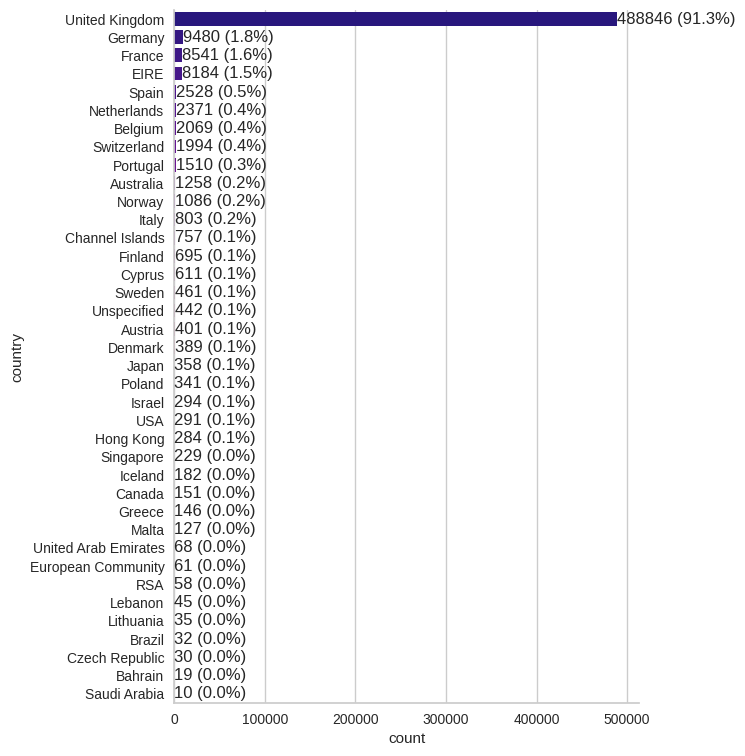

In [ ]:
fig, ax = plt.subplots(figsize=(6,9))
single_countplot(df_raw,ax,y='country')

- __`Country observations`__:
    - Existem alguns valores estranhos:`Unspecified` e `European Community`.
    - **Action** - Por representarem menos de 0.5% da base, não iremos fazer nada.

## <b><span style='color:white;font-size:90%'>6.2 | </span><span style='color:#6e7570;font-size:90%'>Numerical attr - investigation</span></b>

### 6.2.1 Quantity

- Valores negativos em `quantity` (Validamos que são de pedidos cancelados)
  - É importante entender os padrões de cancelamento dos clientes, portanto, uma estratégia interessante é manter essas transações canceladas no conjunto de dados, marcando-as de forma distinta para facilitar análises posteriores. Além disso, esta abordagem pode servir para na construção de um sistema de recomendação, tal sistema evitar a recomendação de produtos com alta probabilidade de serem cancelados.
  - **Action**:Manter as transações canceladas e classificá-las no dataset para análises posteriores.

### 6.2.2 Unit price

Já observamos que existem preços unitários com valor zero. Precisamos investigar as transações com valor zero para saber se existe algum padrão nelas.

In [ ]:
zero_price = df_raw[df_raw['unit_price']==0]
zero_price['quantity'].describe()

count     1056.000000
mean      -114.347538
std        779.427083
min      -9600.000000
25%        -57.000000
50%          1.000000
75%          2.000000
max      12540.000000
Name: quantity, dtype: float64

- Valores menores que zero em `unit_price` (Pode ser brinde ou promoção)
  - Existem 1056 transações com valor zero. Elas possuem um desvio padrão alto e grandes outliers. Manter estas transações pode inserir ruídos e afetar a clusterização.
  - **Action**: Remover transações <=0

# <b><span style='color:white;font-size:90%'>7 | </span><span style='color:#6e7570;font-size:90%'>Análise das transações canceladas x não canceladas</span></b>

Para melhorar a nossa compreensão do comportamento e das preferências dos clientes, precisamos de ter em conta as transações que foram canceladas. Vamos divir no dataset as transações canceladas das não canceladas para uma posterior análise.

In [ ]:
df_raw['transaction_status'] = np.where(df_raw['invoice_no'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

cancelled_transactions = df_raw[df_raw['transaction_status'] == 'Cancelled']
cancelled_transactions.describe()

,quantity,invoice_date,unit_price
count,9251.000000,9251,9251.000000
mean,-29.787050,2011-06-26 07:06:45.231866880,48.570430
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-21 16:26:00,1.450000
50%,-2.000000,2011-07-08 13:04:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,5.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1147.997592,NaN,667.926393


In [ ]:
summary_analysis(cancelled_transactions.select_dtypes(exclude='object').drop('invoice_date',axis=1))

,Attr,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,quantity,-80995.00,-1.0,80994.00,-29.78705,-2.00,1147.935543,-67.175838,4560.446713
1,unit_price,0.01,38970.0,38969.99,48.57043,2.95,667.890292,32.175215,1465.747324


In [ ]:
completed_transactions = df_raw[df_raw['transaction_status'] == 'Completed']

In [ ]:
summary_analysis(completed_transactions.select_dtypes(exclude='object').drop('invoice_date',axis=1))

,Attr,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,quantity,-9600.00,80995.00,90595.00,10.365655,3.00,160.075571,435.612740,212512.091280
1,unit_price,-11062.06,13541.33,24603.39,3.872616,2.08,42.021193,60.250035,51896.366582


# <b><span style='color:white;font-size:90%'>8 | </span><span style='color:#6e7570;font-size:90%'>Filtragem das variáveis</span></b>





É hora de aplicar as ações definidas após a investigação das variáveis.

In [ ]:
# numerical attr
df = df_raw[df_raw['unit_price']>0]

# categorical attr
df = df_raw[~df_raw['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# <b><span style='color:white;font-size:90%'>9 | </span><span style='color:#6e7570;font-size:90%'>Feature Engineering</span></b>

Para iniciar a criação de novos atributos primeiro devemos ter um dataframe base apenas com os ids únicos de cada cliente, pois o `customer_id` será a referência principal.

In [ ]:
# data reference
df_ref = pd.DataFrame(df['customer_id'].unique(),columns=['customer_id'])
df_ref.head()

,customer_id
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


É importante destacar que algumas features deveremos calcular apenas usando a base de dados de transações completas, pois se incluirmos canceladas, podemos, por exemplo, calcular um valor errado para frequência de compras, dado que existem valores negativos em `quantity` e `unit_price`.

## <b><span style='color:white;font-size:90%'>9.1 | </span><span style='color:#6e7570;font-size:90%'>Frequency features</span></b>

- **frequency** = Número de compras de cada cliente
- **total_products_purchased** = Número de produtos comprados por cada cliente

In [ ]:
# frequency
df_freq = completed_transactions[['customer_id', 'invoice_no']].groupby('customer_id').nunique().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )

In [ ]:
df_ref.rename(columns={'invoice_no':'frequency'},inplace=True)
df_ref.head()

,customer_id,frequency
0,17850.0,34.0
1,13047.0,10.0
2,12583.0,15.0
3,13748.0,5.0
4,15100.0,3.0


In [ ]:
total_products  = completed_transactions.groupby('customer_id')['quantity'].sum().reset_index()
total_products.rename(columns={'quantity':'total_products_purchased'},inplace=True)

In [ ]:
df_ref = pd.merge( df_ref, total_products, on='customer_id', how='left' )
df_ref.head()

,customer_id,frequency,total_products_purchased
0,17850.0,34.0,1733.0
1,13047.0,10.0,1391.0
2,12583.0,15.0,5060.0
3,13748.0,5.0,439.0
4,15100.0,3.0,80.0


## <b><span style='color:white;font-size:90%'>9.2 | </span><span style='color:#6e7570;font-size:90%'>Monetary features</span></b>

- **total_spend (faturamento)** = Faturamento ou total gasto de cada cliente
- **avg_transaction** = O valor médio gasto por cada cliente

In [ ]:
# total spend (faturamento) = quantity * price
completed_transactions['total_spend'] = completed_transactions['quantity'] * completed_transactions['unit_price']
# avg_transaction
avg_transaction = completed_transactions[['customer_id','total_spend']].groupby( 'customer_id' ).mean().reset_index()
avg_transaction.rename(columns={'total_spend':'avg_transaction'},inplace=True)
# total spend ou gross revenue (soma de total_spend)
gross_revenue = completed_transactions[['customer_id', 'total_spend']].groupby( 'customer_id' ).sum().reset_index()

In [ ]:
df_ref = pd.merge(df_ref, gross_revenue, on='customer_id',how='left')
df_ref = pd.merge(df_ref, avg_transaction, on='customer_id',how='left')
df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction
0,17850.0,34.0,1733.0,5391.21,18.152222
1,13047.0,10.0,1391.0,3237.54,18.822907
2,12583.0,15.0,5060.0,7281.38,29.479271
3,13748.0,5.0,439.0,948.25,33.866071
4,15100.0,3.0,80.0,876.00,292.000000


## <b><span style='color:white;font-size:90%'>9.3 | </span><span style='color:#6e7570;font-size:90%'>Recency features</span></b>

- **recency_days** = Dias desde a última compra de cada cliente

In [ ]:
# Recency - Last day purchase
# pegando a data mais recente de compra para cada customer
df_recency = completed_transactions[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
# calculando o recency_days = data máxima do dataset - data máxima de compra de cada customer
df_recency['recency_days'] = ( df_raw['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency.drop('invoice_date', axis=1, inplace=True)

In [ ]:
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days
0,17850.0,34.0,1733.0,5391.21,18.152222,371.0
1,13047.0,10.0,1391.0,3237.54,18.822907,31.0
2,12583.0,15.0,5060.0,7281.38,29.479271,2.0
3,13748.0,5.0,439.0,948.25,33.866071,95.0
4,15100.0,3.0,80.0,876.00,292.000000,333.0


## <b><span style='color:white;font-size:90%'>9.4 | </span><span style='color:#6e7570;font-size:90%'>Product diversity features</span></b>

- **unique_products_purchased** = O número de produtos distintos comprados por cada cliente. Um valor alto indica um cliente com um gosto variado, enquanto um baixo valor indica um cliente com um gosto específico. Isso pode ajudar a segmentar os clientes com base na sua diversidade de compras.

In [ ]:
unique_products_purchased = completed_transactions.groupby('customer_id')['stock_code'].nunique().reset_index()
unique_products_purchased.rename(columns={'stock_code': 'unique_products_purchased'}, inplace=True)

df_ref = pd.merge(df_ref, unique_products_purchased, on='customer_id', how='left')
df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased
0,17850.0,34.0,1733.0,5391.21,18.152222,371.0,21.0
1,13047.0,10.0,1391.0,3237.54,18.822907,31.0,106.0
2,12583.0,15.0,5060.0,7281.38,29.479271,2.0,115.0
3,13748.0,5.0,439.0,948.25,33.866071,95.0,24.0
4,15100.0,3.0,80.0,876.00,292.000000,333.0,1.0


## <b><span style='color:white;font-size:90%'>9.5 | </span><span style='color:#6e7570;font-size:90%'>Behavioral features</span></b>

- **avg_days_between_purchases** - Média de dias que um cliente espera antes de fazer outra compra. Isso pode ajudar a prever quando o cliente fará sua próxima compra.
- **favorite_shopping_day** - Dia da semana em que o cliente mais compra.
- **favorite_shopping_hour** - Horário de compras favorito.

In [ ]:
# segunda:0
# terça:1
# quarta:2
# quinta:3
# sexta:4
# sábado:5
# domingo:6

In [ ]:
completed_transactions["day_of_week"] = completed_transactions["invoice_date"].dt.dayofweek
completed_transactions["hour"] = completed_transactions["invoice_date"].dt.hour

In [ ]:
completed_transactions["invoice_day"] = completed_transactions["invoice_date"].dt.date
completed_transactions["invoice_day"] = pd.to_datetime(completed_transactions['invoice_day'])

In [ ]:
days_between_purchases = completed_transactions.groupby("customer_id")["invoice_day"].apply(
    lambda x: (x.diff().dropna()).apply(lambda y: y.days)
)
average_days_between_purchases = (
    days_between_purchases.groupby("customer_id").mean().reset_index()
)
average_days_between_purchases.rename(
    columns={"invoice_day": "average_days_between_purchases"}, inplace=True
)

In [ ]:
display(days_between_purchases.head(), average_days_between_purchases.head())

customer_id       
12347.0      14939    0
             14940    0
             14941    0
             14942    0
             14943    0
Name: invoice_day, dtype: int64

,customer_id,average_days_between_purchases
0,12347.0,2.016575
1,12348.0,9.433333
2,12349.0,0.000000
3,12350.0,0.000000
4,12352.0,3.095238


In [ ]:
favorite_shopping_day = (
    completed_transactions.groupby(["customer_id", "day_of_week"]).size().reset_index(name="count")
)
favorite_shopping_day = favorite_shopping_day.loc[
    favorite_shopping_day.groupby("customer_id")["count"].idxmax()
][["customer_id", "day_of_week"]]

In [ ]:
favorite_shopping_hour = (
    completed_transactions.groupby(["customer_id", "hour"]).size().reset_index(name="count")
)
favorite_shopping_hour = favorite_shopping_hour.loc[
    favorite_shopping_hour.groupby("customer_id")["count"].idxmax()
][["customer_id", "hour"]]

In [ ]:
df_ref = pd.merge(df_ref, average_days_between_purchases, on="customer_id", how="left")
df_ref = pd.merge(df_ref, favorite_shopping_day, on="customer_id", how="left")
df_ref = pd.merge(df_ref, favorite_shopping_hour, on="customer_id", how="left")

df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour
0,17850.0,34.0,1733.0,5391.21,18.152222,371.0,21.0,0.003378,3.0,9.0
1,13047.0,10.0,1391.0,3237.54,18.822907,31.0,106.0,2.000000,2.0,13.0
2,12583.0,15.0,5060.0,7281.38,29.479271,2.0,115.0,1.508130,4.0,12.0
3,13748.0,5.0,439.0,948.25,33.866071,95.0,24.0,10.296296,0.0,9.0
4,15100.0,3.0,80.0,876.00,292.000000,333.0,1.0,20.000000,2.0,9.0


## <b><span style='color:white;font-size:90%'>9.6 | </span><span style='color:#6e7570;font-size:90%'>Cancellation features</span></b>

- **cancellation_frequency** - Número total de tansações que um cliente cancelou. Isso pode ajudar a identificar clientes com maior probabilidade de cancelar transações.
- **cancellation_rate** - Proporção de transações canceladas por um cliente. Um alta taxa de cancelamento pode indicar clientes insatisfeitos que podem ser identificados durante a clusterização.

In [ ]:
total_transactions = df_raw.groupby('customer_id')['invoice_no'].nunique().reset_index()

cancelled_transactions = df_raw[df_raw['transaction_status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('customer_id')['invoice_no'].nunique().reset_index()
cancellation_frequency.rename(columns={'invoice_no': 'cancellation_frequency'}, inplace=True)

In [ ]:
df_ref = pd.merge(df_ref, cancellation_frequency, on='customer_id', how='left')
# substituir os valores nulos por 0 (para clientes que não cancelaram nenhuma transação)
df_ref['cancellation_frequency'].fillna(0, inplace=True)

In [ ]:
# calculate the Cancellation Rate
df_ref['cancellation_rate'] = df_ref['cancellation_frequency'] / total_transactions['invoice_no']

df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate
0,17850.0,34.0,1733.0,5391.21,18.152222,371.0,21.0,0.003378,3.0,9.0,1.0,0.500000
1,13047.0,10.0,1391.0,3237.54,18.822907,31.0,106.0,2.000000,2.0,13.0,8.0,1.142857
2,12583.0,15.0,5060.0,7281.38,29.479271,2.0,115.0,1.508130,4.0,12.0,3.0,0.750000
3,13748.0,5.0,439.0,948.25,33.866071,95.0,24.0,10.296296,0.0,9.0,0.0,0.000000
4,15100.0,3.0,80.0,876.00,292.000000,333.0,1.0,20.000000,2.0,9.0,3.0,3.000000


## <b><span style='color:white;font-size:90%'>9.7 | </span><span style='color:#6e7570;font-size:90%'>Seasonality features</span></b>

- **monthly_spending_mean** - Este é o valor médio que um cliente gasta mensalmente. Isso nos ajuda a avaliar o hábito geral de consumo de cada cliente. Uma média mais alta indica um cliente que gasta mais, potencialmente demonstrando interesse em produtos premium, enquanto uma média mais baixa pode indicar um cliente mais preocupado com o orçamento.

- **monthly_spending_std** - Este recurso indica a variabilidade nos gastos mensais de um cliente. Um valor mais alto indica que os gastos do cliente flutuam significativamente mês a mês, talvez indicando grandes compras esporádicas. Em contraste, um valor mais baixo sugere hábitos de consumo mais estáveis e consistentes. Compreender essa variabilidade pode ajudar na elaboração de promoções ou descontos personalizados durante os períodos em que se espera que gastem mais.

In [ ]:
completed_transactions['year'] = completed_transactions['invoice_date'].dt.year
completed_transactions['month'] = completed_transactions['invoice_date'].dt.month

In [ ]:
monthly_spending = completed_transactions.groupby(['customer_id','year','month'])['total_spend'].sum().reset_index()

In [ ]:
seasonal_buying_patterns = monthly_spending.groupby('customer_id')['total_spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'monthly_spending_mean', 'std': 'monthly_spending_std'}, inplace=True)

In [ ]:
# Substituir NaN values em Monthly_Spending_Std por 0,
# pois implica em clientes com uma única transação no mês
seasonal_buying_patterns['monthly_spending_std'].fillna(0, inplace=True)

In [ ]:
df_ref = pd.merge(df_ref, seasonal_buying_patterns, on='customer_id')
df_ref.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
0,17850.0,34.0,1733.0,5391.21,18.152222,371.0,21.0,0.003378,3.0,9.0,1.0,0.500000,5391.210000,0.000000
1,13047.0,10.0,1391.0,3237.54,18.822907,31.0,106.0,2.000000,2.0,13.0,8.0,1.142857,404.692500,174.402907
2,12583.0,15.0,5060.0,7281.38,29.479271,2.0,115.0,1.508130,4.0,12.0,3.0,0.750000,606.781667,285.194031
3,13748.0,5.0,439.0,948.25,33.866071,95.0,24.0,10.296296,0.0,9.0,0.0,0.000000,316.083333,97.181947
4,15100.0,3.0,80.0,876.00,292.000000,333.0,1.0,20.000000,2.0,9.0,3.0,3.000000,438.000000,371.655324


In [ ]:
df_ref.isna().sum()

customer_id                        0
frequency                          0
total_products_purchased           0
total_spend                        0
avg_transaction                    0
recency_days                       0
unique_products_purchased          0
average_days_between_purchases    70
day_of_week                        0
hour                               0
cancellation_frequency             0
cancellation_rate                  0
monthly_spending_mean              0
monthly_spending_std               0
dtype: int64

In [ ]:
# clientes com uma única compra terão valor nulo para average_days_between_purchases
df_ref[df_ref['average_days_between_purchases'].isna()].head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
18,13747.0,1.0,8.0,79.60,79.60,373.0,1.0,NaN,2.0,10.0,0.0,0.000000,79.60,0.0
108,17925.0,1.0,72.0,244.08,244.08,372.0,1.0,NaN,3.0,10.0,0.0,0.000000,244.08,0.0
122,15070.0,1.0,36.0,106.20,106.20,372.0,1.0,NaN,3.0,11.0,0.0,0.000000,106.20,0.0
160,15823.0,1.0,1.0,15.00,15.00,371.0,1.0,NaN,3.0,15.0,1.0,0.333333,15.00,0.0
192,14576.0,1.0,12.0,35.40,35.40,371.0,1.0,NaN,3.0,17.0,0.0,0.000000,35.40,0.0


In [ ]:
df_ref['average_days_between_purchases'].fillna(0, inplace=True)

In [ ]:
customer_data = df_ref.convert_dtypes()

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     4338 non-null   string 
 1   frequency                       4338 non-null   Int64  
 2   total_products_purchased        4338 non-null   Int64  
 3   total_spend                     4338 non-null   Float64
 4   avg_transaction                 4338 non-null   Float64
 5   recency_days                    4338 non-null   Int64  
 6   unique_products_purchased       4338 non-null   Int64  
 7   average_days_between_purchases  4338 non-null   Float64
 8   day_of_week                     4338 non-null   Int64  
 9   hour                            4338 non-null   Int64  
 10  cancellation_frequency          4338 non-null   Int64  
 11  cancellation_rate               4338 non-null   Float64
 12  monthly_spending_mean           43

# <b><span style='color:white;font-size:90%'>10 | </span><span style='color:#6e7570;font-size:90%'>Outlier detection</span></b>

Nesta seção, identificarei e tratarei valores discrepantes em nosso conjunto de dados. Vou usar o algoritmo Isolation Forest para esta tarefa.

In [ ]:
model = IsolationForest(contamination=0.05, random_state=0)

customer_data['outlier_scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

customer_data['is_outlier'] = [1 if x == -1 else 0 for x in customer_data['outlier_scores']]

customer_data.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std,outlier_scores,is_outlier
0,17850.0,34,1733,5391.21,18.152222,371,21,0.003378,3,9,1,0.5,5391.21,0.0,-1,1
1,13047.0,10,1391,3237.54,18.822907,31,106,2.0,2,13,8,1.142857,404.6925,174.402907,1,0
2,12583.0,15,5060,7281.38,29.479271,2,115,1.50813,4,12,3,0.75,606.781667,285.194031,1,0
3,13748.0,5,439,948.25,33.866071,95,24,10.296296,0,9,0,0.0,316.083333,97.181947,1,0
4,15100.0,3,80,876.0,292.0,333,1,20.0,2,9,3,3.0,438.0,371.655324,-1,1


In [ ]:
outlier_percentage = customer_data['is_outlier'].value_counts(normalize=True)*100

Text(0, 0.5, '%')

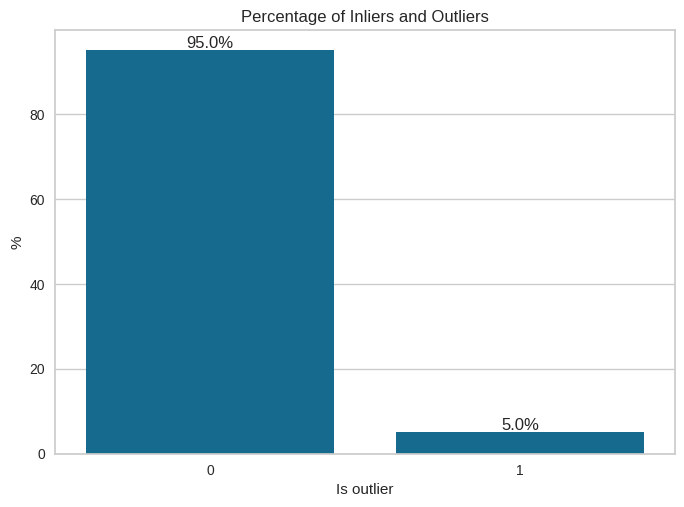

In [ ]:
ax = sns.barplot(x=outlier_percentage.index,y=outlier_percentage.values)
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x.round(2)}%')
plt.title('Percentage of Inliers and Outliers')
plt.xlabel('Is outlier')
plt.ylabel('%')

No gráfico acima, podemos observar que cerca de 5% dos clientes foram identificados como discrepantes em nosso conjunto de dados.

Estratégia:

Considerando a natureza do projeto (segmentação de clientes através de clustering), é crucial lidar com estes outliers para evitar que afetem significativamente a qualidade dos clusters.

Iremos realizar as seguintes etapas:
- Remover os valores discrepantes do conjunto de dados principal para evitar que influenciem o processo de clustering.
- Eliminar as colunas Outlier_Scores e Is_Outlier, pois eram colunas auxiliares usadas para o processo de detecção de outliers.

In [ ]:
# separando os outliers
#outliers_data = customer_data[customer_data['is_outlier'] == 1]

# removendo os outliers do dataset principal
customer_data_cleaned = customer_data[customer_data['is_outlier'] == 0]

# exncluindo as colunas 'outlier_scores' e 'is_outlier'
customer_data_cleaned = customer_data_cleaned.drop(columns=['outlier_scores', 'is_outlier'])

In [ ]:
customer_data_cleaned

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
1,13047.0,10,1391,3237.54,18.822907,31,106,2.0,2,13,8,1.142857,404.6925,174.402907
2,12583.0,15,5060,7281.38,29.479271,2,115,1.50813,4,12,3,0.75,606.781667,285.194031
3,13748.0,5,439,948.25,33.866071,95,24,10.296296,0,9,0,0.0,316.083333,97.181947
5,15291.0,15,2103,4668.3,45.323301,25,62,3.411765,2,16,5,0.454545,666.9,179.245487
7,17809.0,12,2057,5411.91,88.719836,15,46,5.95,4,15,3,3.0,676.48875,688.795821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,13436.0,1,76,196.89,16.4075,1,12,0.0,3,10,0,0.0,196.89,0.0
4334,15520.0,1,314,343.5,19.083333,1,18,0.0,3,10,0,0.0,343.5,0.0
4335,13298.0,1,96,360.0,180.0,0,2,0.0,3,13,0,0.0,360.0,0.0
4336,14569.0,1,79,227.39,18.949167,0,10,0.0,3,14,0,0.0,227.39,0.0


In [ ]:
# resetando o index da base de dados
customer_data_cleaned.reset_index(drop=True, inplace=True)

# <b><span style='color:white;font-size:90%'>11 | </span><span style='color:#6e7570;font-size:90%'>Correlation Analysis</span></b>

Antes de prosseguirmos para o clustering, é essencial verificar a correlação entre os recursos em nosso conjunto de dados. A presença de multicolinearidade, onde os recursos são altamente correlacionados, pode levar a clusters que não são bem separados e significativos.

Se identificarmos a multicolinearidade, podemos utilizar técnicas de redução de dimensionalidade como PCA.

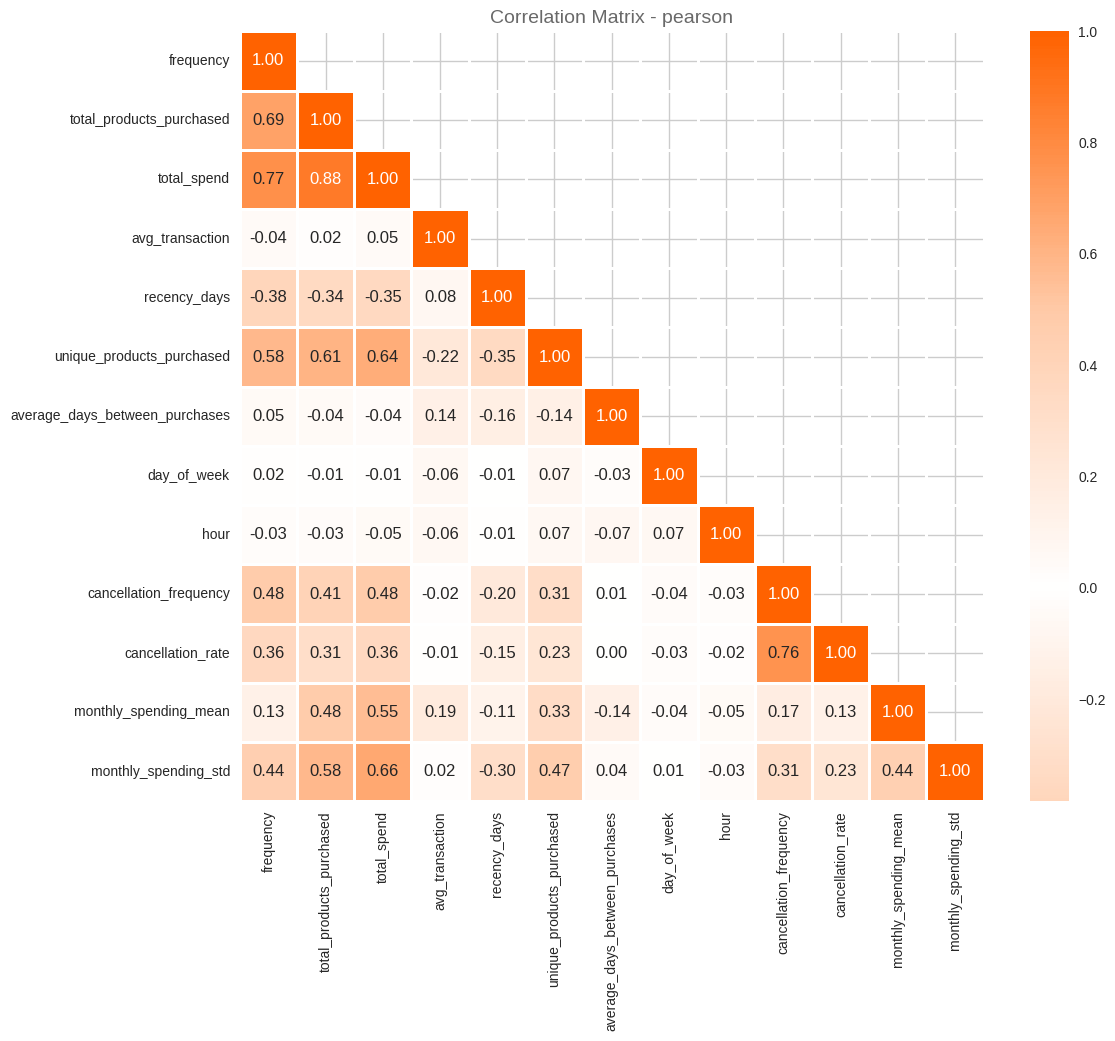

In [ ]:
show_correlation_matrix(customer_data_cleaned)

Olhando para o heatmap acima, podemos ver que existem alguns pares de variáveis que possuem altas correlações, por exemplo:

- **total_products_purchased** e **frequency** (0.69)
- **total_spend** e **frequency** (0.77)
- **total_spend** e **total_products_purchased** (0.88)
- **cancellation_rate** e **cancellation_frequency** (0.76)

Estas correlações elevadas indicam um certo grau de multicolinearidade.

# <b><span style='color:white;font-size:90%'>12 | </span><span style='color:#6e7570;font-size:90%'>Feature Scaling</span></b>

Antes de avançarmos com o clustering e a redução da dimensionalidade, é importante dimensionar nossos recursos. Pois algoritmos como o K-means dependem muito do conceito de 'distância' entre pontos de dados para formar clusters. Quando os recursos não estão em uma escala semelhante, os recursos com valores maiores podem influenciar desproporcionalmente o resultado do agrupamento, levando potencialmente a agrupamentos incorretos. Quando os recursos não são dimensionados, aqueles com valores maiores podem dominar os outros, não refletindo com precisão os padrões subjacentes nos dados.

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
cols = ['frequency', 'total_products_purchased', 'total_spend',
       'avg_transaction', 'recency_days', 'unique_products_purchased',
       'average_days_between_purchases', 'day_of_week', 'hour',
       'cancellation_frequency', 'cancellation_rate', 'monthly_spending_mean',
       'monthly_spending_std']

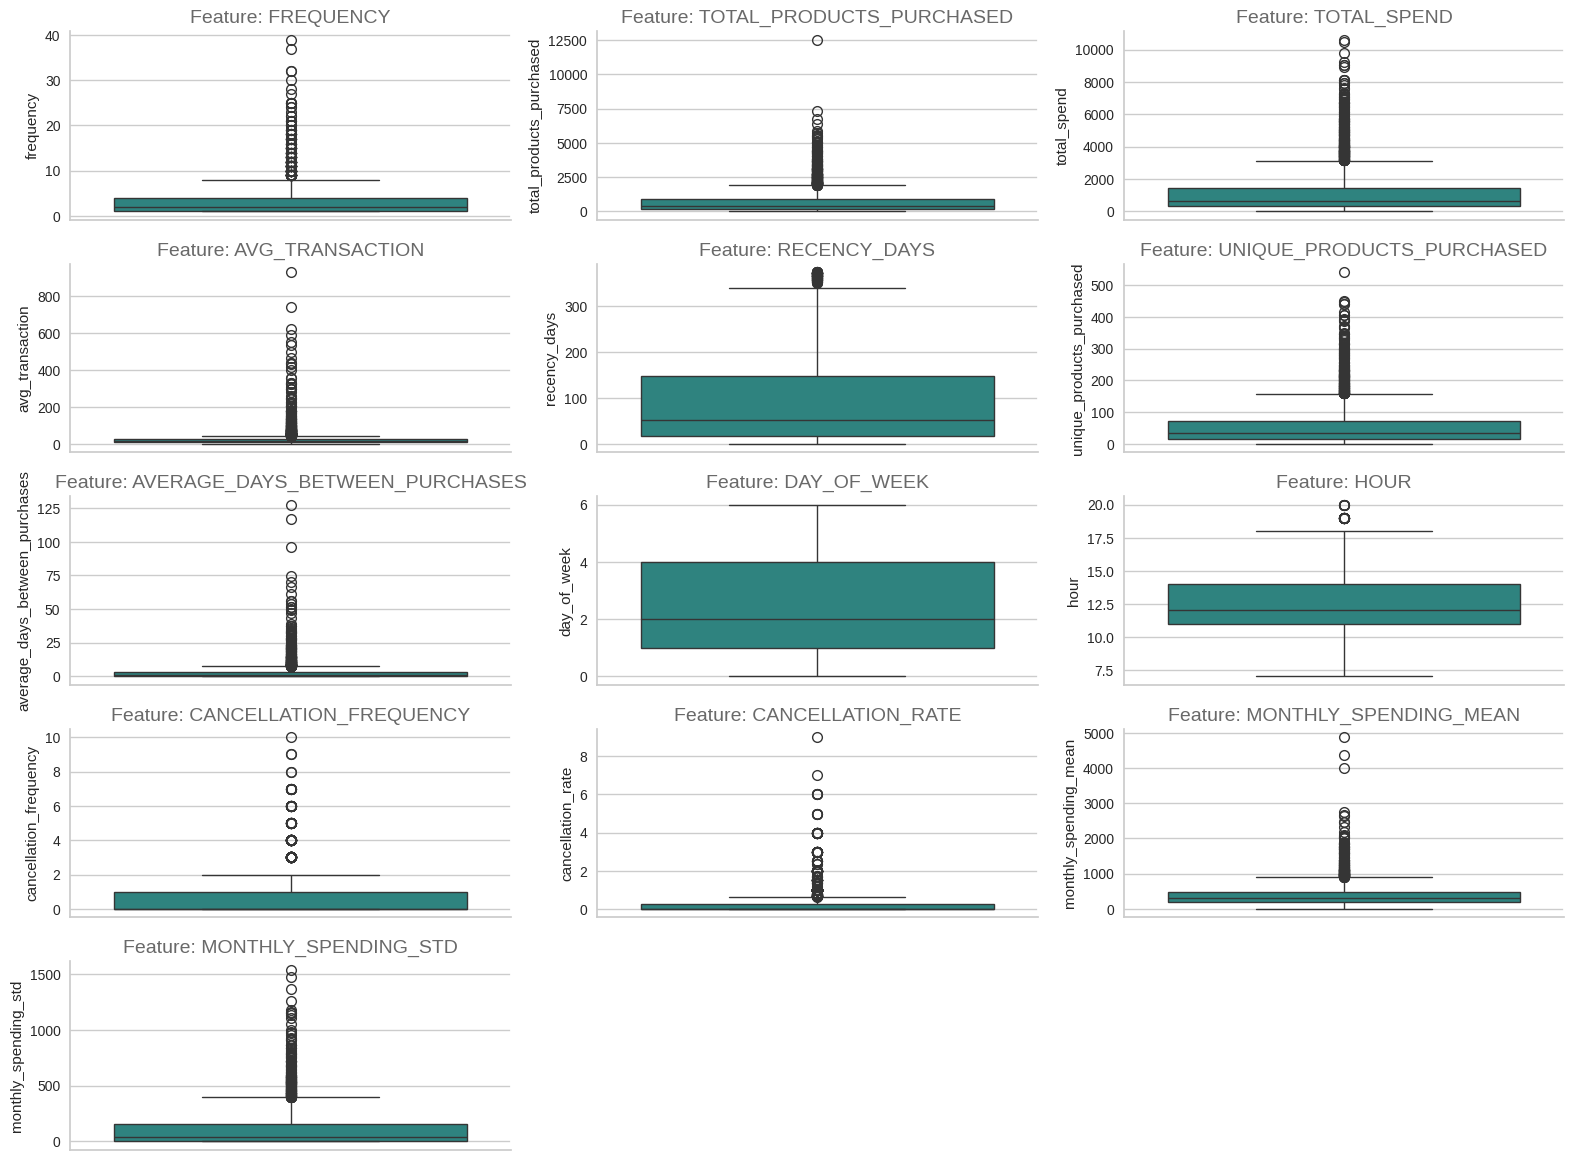

In [ ]:
boxplot(customer_data_cleaned,features=cols, fig_cols=3)

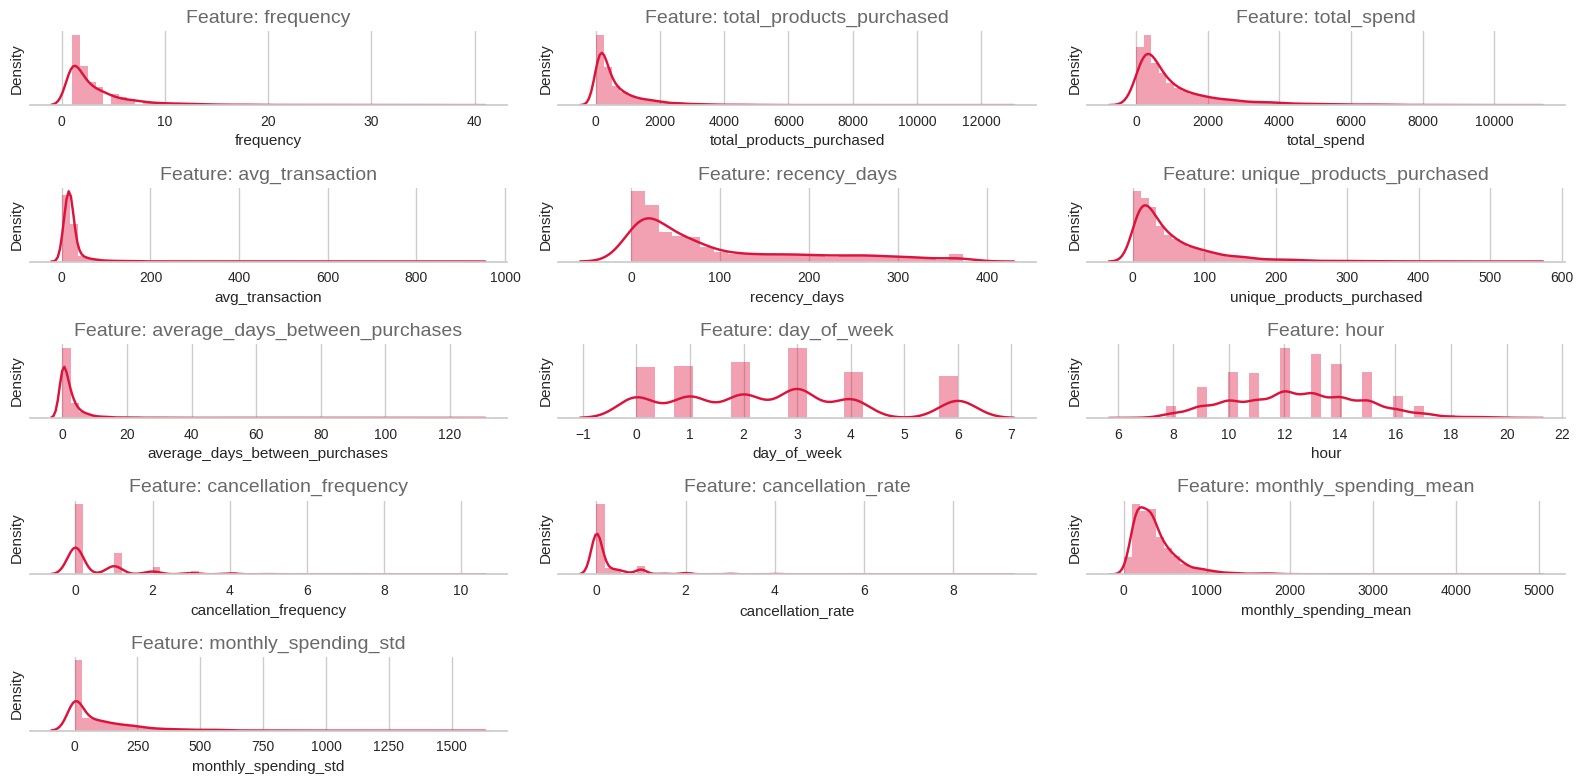

In [ ]:
distplot(customer_data_cleaned,features=cols, fig_cols=3, hist=True)

Com base nas distribuições acima, para garantir uma influência equilibrada no modelo e revelar os verdadeiros padrões nos dados, vou padronizar nossos dados usando o MinMaxScaler. No entanto, nem todos os recursos requerem dimensionamento:

- **customer_id**: Este recurso é apenas um identificador para os clientes e não contém nenhuma informação significativa para clustering.

In [ ]:
# lista de colunas que não precisam de escalonamento
columns_to_not_scaled= ['customer_id']
# lista de colunas que precisam de escalonamento
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_not_scaled)

In [ ]:
columns_to_scale

Index(['average_days_between_purchases', 'avg_transaction',
       'cancellation_frequency', 'cancellation_rate', 'day_of_week',
       'frequency', 'hour', 'monthly_spending_mean', 'monthly_spending_std',
       'recency_days', 'total_products_purchased', 'total_spend',
       'unique_products_purchased'],
      dtype='object')

In [ ]:
customer_data_scaled = customer_data_cleaned.copy()
customer_data_scaled.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
0,13047.0,10,1391,3237.54,18.822907,31,106,2.0,2,13,8,1.142857,404.6925,174.402907
1,12583.0,15,5060,7281.38,29.479271,2,115,1.50813,4,12,3,0.75,606.781667,285.194031
2,13748.0,5,439,948.25,33.866071,95,24,10.296296,0,9,0,0.0,316.083333,97.181947
3,15291.0,15,2103,4668.3,45.323301,25,62,3.411765,2,16,5,0.454545,666.9,179.245487
4,17809.0,12,2057,5411.91,88.719836,15,46,5.95,4,15,3,3.0,676.48875,688.795821


In [ ]:
# aplicando o scaler nas colunas necessárias
customer_data_scaled[columns_to_scale] = minmax_scaler.fit_transform(customer_data_scaled[columns_to_scale])

In [ ]:
pickle.dump(minmax_scaler, open('minmax_ scaler.pkl', 'wb'))

In [ ]:
customer_data_scaled.head()

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
0,13047.0,0.236842,0.110854,0.305091,0.020207,0.083110,0.194805,0.015686,0.333333,0.461538,0.8,0.126984,0.083034,0.113271
1,12583.0,0.368421,0.403461,0.686164,0.031647,0.005362,0.211503,0.011828,0.666667,0.384615,0.3,0.083333,0.124498,0.185227
2,13748.0,0.105263,0.034931,0.089359,0.036356,0.254692,0.042672,0.080755,0.000000,0.153846,0.0,0.000000,0.064853,0.063118
3,15291.0,0.368421,0.167637,0.439919,0.048656,0.067024,0.113173,0.026759,0.333333,0.692308,0.5,0.050505,0.136833,0.116416
4,17809.0,0.289474,0.163968,0.509994,0.095244,0.040214,0.083488,0.046667,0.666667,0.615385,0.3,0.333333,0.138801,0.447358


# <b><span style='color:white;font-size:90%'>13 | </span><span style='color:#6e7570;font-size:90%'>Dimensionality reduction</span></b>

Um alto número de features pode dificultar a tarefa de encontrar clusters compactos e coesos. Ao focar apenas nos recursos mais importantes, podemos potencialmente remover o ruído dos dados, levando a clusters mais precisos e estáveis.

In [ ]:
# setando o customer_id como index
customer_data_scaled.set_index('customer_id', inplace=True)

Vemos também a formação de clusters, porém ainda temos um cluster muito grande e aglomerado, seguiremos com as análises.

## <b><span style='color:white;font-size:90%'>13.1 | </span><span style='color:#6e7570;font-size:90%'>Tree-Based Embedding Analysis</span></b>

Esse é um problema não supervisionado. Então não tenho uma variável target. Mas, pensando no negócio eu quero uma variável que organize os meus clientes de maneira que eu consiga encontrar os mais valiosos. No caso, os clientes que gastam mais podem ser os mais valiosos.

Então vamos usar a variável `total_spend` como variável resposta e treinar a árvore.

In [ ]:
x_train = customer_data_cleaned.drop(columns=['customer_id','total_spend'],axis=1)
y_train = customer_data_cleaned[['total_spend']]

In [ ]:
r_forest = RandomForestRegressor(n_estimators=100, random_state=42)
r_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
pickle.dump(r_forest, open('r_forest.pkl', 'wb'))

O método apply vai aplicar toda a estrutura da árvore criada em cima dos dados de treino.

In [ ]:
df_leaf = pd.DataFrame(r_forest.apply(x_train))

In [ ]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4794,4851,4814,4647,4418,4236,4414,4579,4423,4434,...,4599,4580,4781,4526,4814,4385,4445,4458,4534,4556
1,5123,5192,5130,5172,5120,5241,5108,5114,5101,5216,...,5090,5145,5176,5070,5101,5138,5108,5105,5161,5229
2,2866,2967,3017,3093,3023,3064,3053,3030,3019,2988,...,3074,3106,3206,3080,2914,2923,2977,3100,3007,3117
3,4853,4921,4874,4942,4929,4981,4927,4855,4925,5042,...,4968,4843,4956,4859,4845,4865,4888,4891,4960,5031
4,4850,4941,4901,4917,4925,4962,4978,4869,4934,4800,...,4982,4924,5018,4856,4834,4879,4891,4902,5139,5032


Cada coluna é uma árvore diferente. Cada linha é um cliente diferente. Então, por exemplo, o 4794 (que é um index) é a posição na folha que o cliente caiu na primeira árvore (0). E aí este mesmo cliente da linha 0 cai na posição 4851 na segunda árvore (coluna 1).

Mas como temos 100 dimensões, vamos ter que aplicar um embedding novamente para conseguirmos visualizar esses espaços criados pela RandomForest.

In [ ]:
df_leaf.shape

(4121, 100)

In [ ]:
reducer2 = umap.UMAP(random_state=42)
embedding_tree = reducer2.fit_transform(df_leaf)

In [ ]:
pickle.dump(reducer2, open('umap_reducer_tree.pkl', 'wb'))

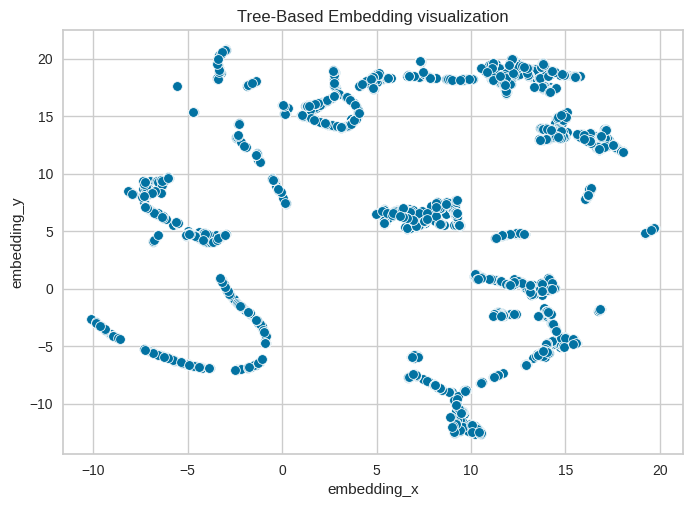

In [ ]:
df_tree = pd.DataFrame(embedding_tree, columns=['embedding_x','embedding_y'])
ax = sns.scatterplot(df_tree, x='embedding_x',y='embedding_y')
ax.set_title("Tree-Based Embedding visualization")
plt.show()

O espaço criado pela árvore nos mostra aparentemente diversos clusters.

A árvore consegue criar um espaço muito preciso. Então podemos dizer um cliente x é vizinho de um cliente y em um espaço de embedding construído com total_spend como target. Quando voltamos para o espaço de features original os clientes x e y podem estar completamente diferentes entre si, mas no espaço de embedding criado pela árvore com total_spend como variável resposta eles são parecidos (pertencendo ao mesmo cluster).

Nesta abordagem, nós perdemos um pouco a explicabilidade de porque os clientes x e y são vizinhos (quando olhamos pro espaço original). Se você não precisa de explicabilidade de como os vizinhos são construídos, essa é uma ótima solução, pois o que importa para o time de neǵocio é a média de compras, frequência, recência de cada cluster . Mas se você precisa explicar pro time de negócio porque um cliente é vizinho do outro, o que neste problema implicaria em explicar porque uma pessoa foi escolhida pro grupo **GUILD** e outra não, então você usa outra abordagem.

# <b><span style='color:white;font-size:90%'>16 | </span><span style='color:#6e7570;font-size:90%'>K-Means Clustering</span></b>

In [ ]:
def kmeans_clustering(space, space_name=''):
  silhouette_scores = []
  start_k = 2
  stop_k = 11
  for k in range(start_k, stop_k):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        km.fit(space)
        labels = km.predict(space)
        score = silhouette_score(space, labels)
        silhouette_scores.append(score)

  plt.plot(range(2, 11), silhouette_scores,linestyle='--',marker='o')
  plt.xlabel('Number of K')
  plt.ylabel('Silhouette Score')
  plt.title(f'K-Means - Silhouette Score vs Number of K - {space_name}')
  plt.show()
  df = pd.DataFrame({
    f'K-Means in {space_name}':silhouette_scores
  })
  df.index = range(2, 11)
  return df

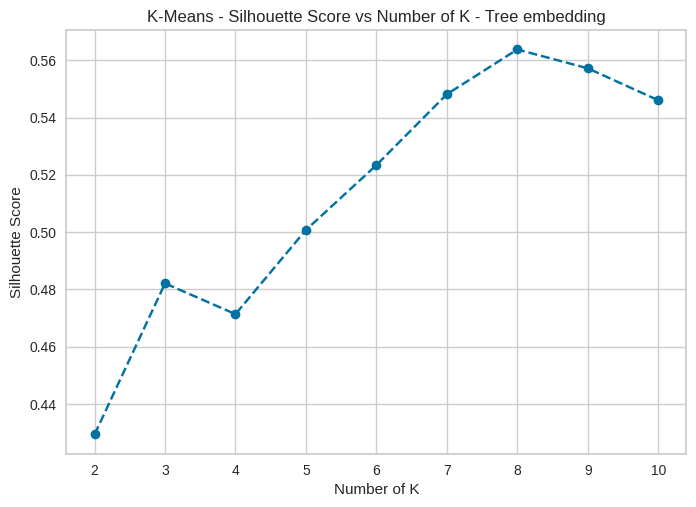

In [ ]:
df_results_km3 = kmeans_clustering(df_tree, 'Tree embedding')

In [ ]:
pd.concat([df_results_km.T, df_results_km2.T, df_results_km3.T]).style.highlight_max(color = 'green', axis = 1)

,2,3,4,5,6,7,8,9,10
K-Means in PCA,0.242627,0.287873,0.287852,0.272050,0.261668,0.258605,0.233397,0.233987,0.232302
K-Means in UMAP,0.734830,0.459969,0.514113,0.492961,0.510703,0.524811,0.507326,0.494050,0.493257
K-Means in Tree embedding,0.429354,0.482099,0.471361,0.500756,0.523381,0.548135,0.563755,0.557177,0.546032


De maneira geral, o Tre-based embedding está nos dando os melhores resultados para um número de clusters maior. Seguiremos utilizando este espaço.

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    #sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    #plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
     #        horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

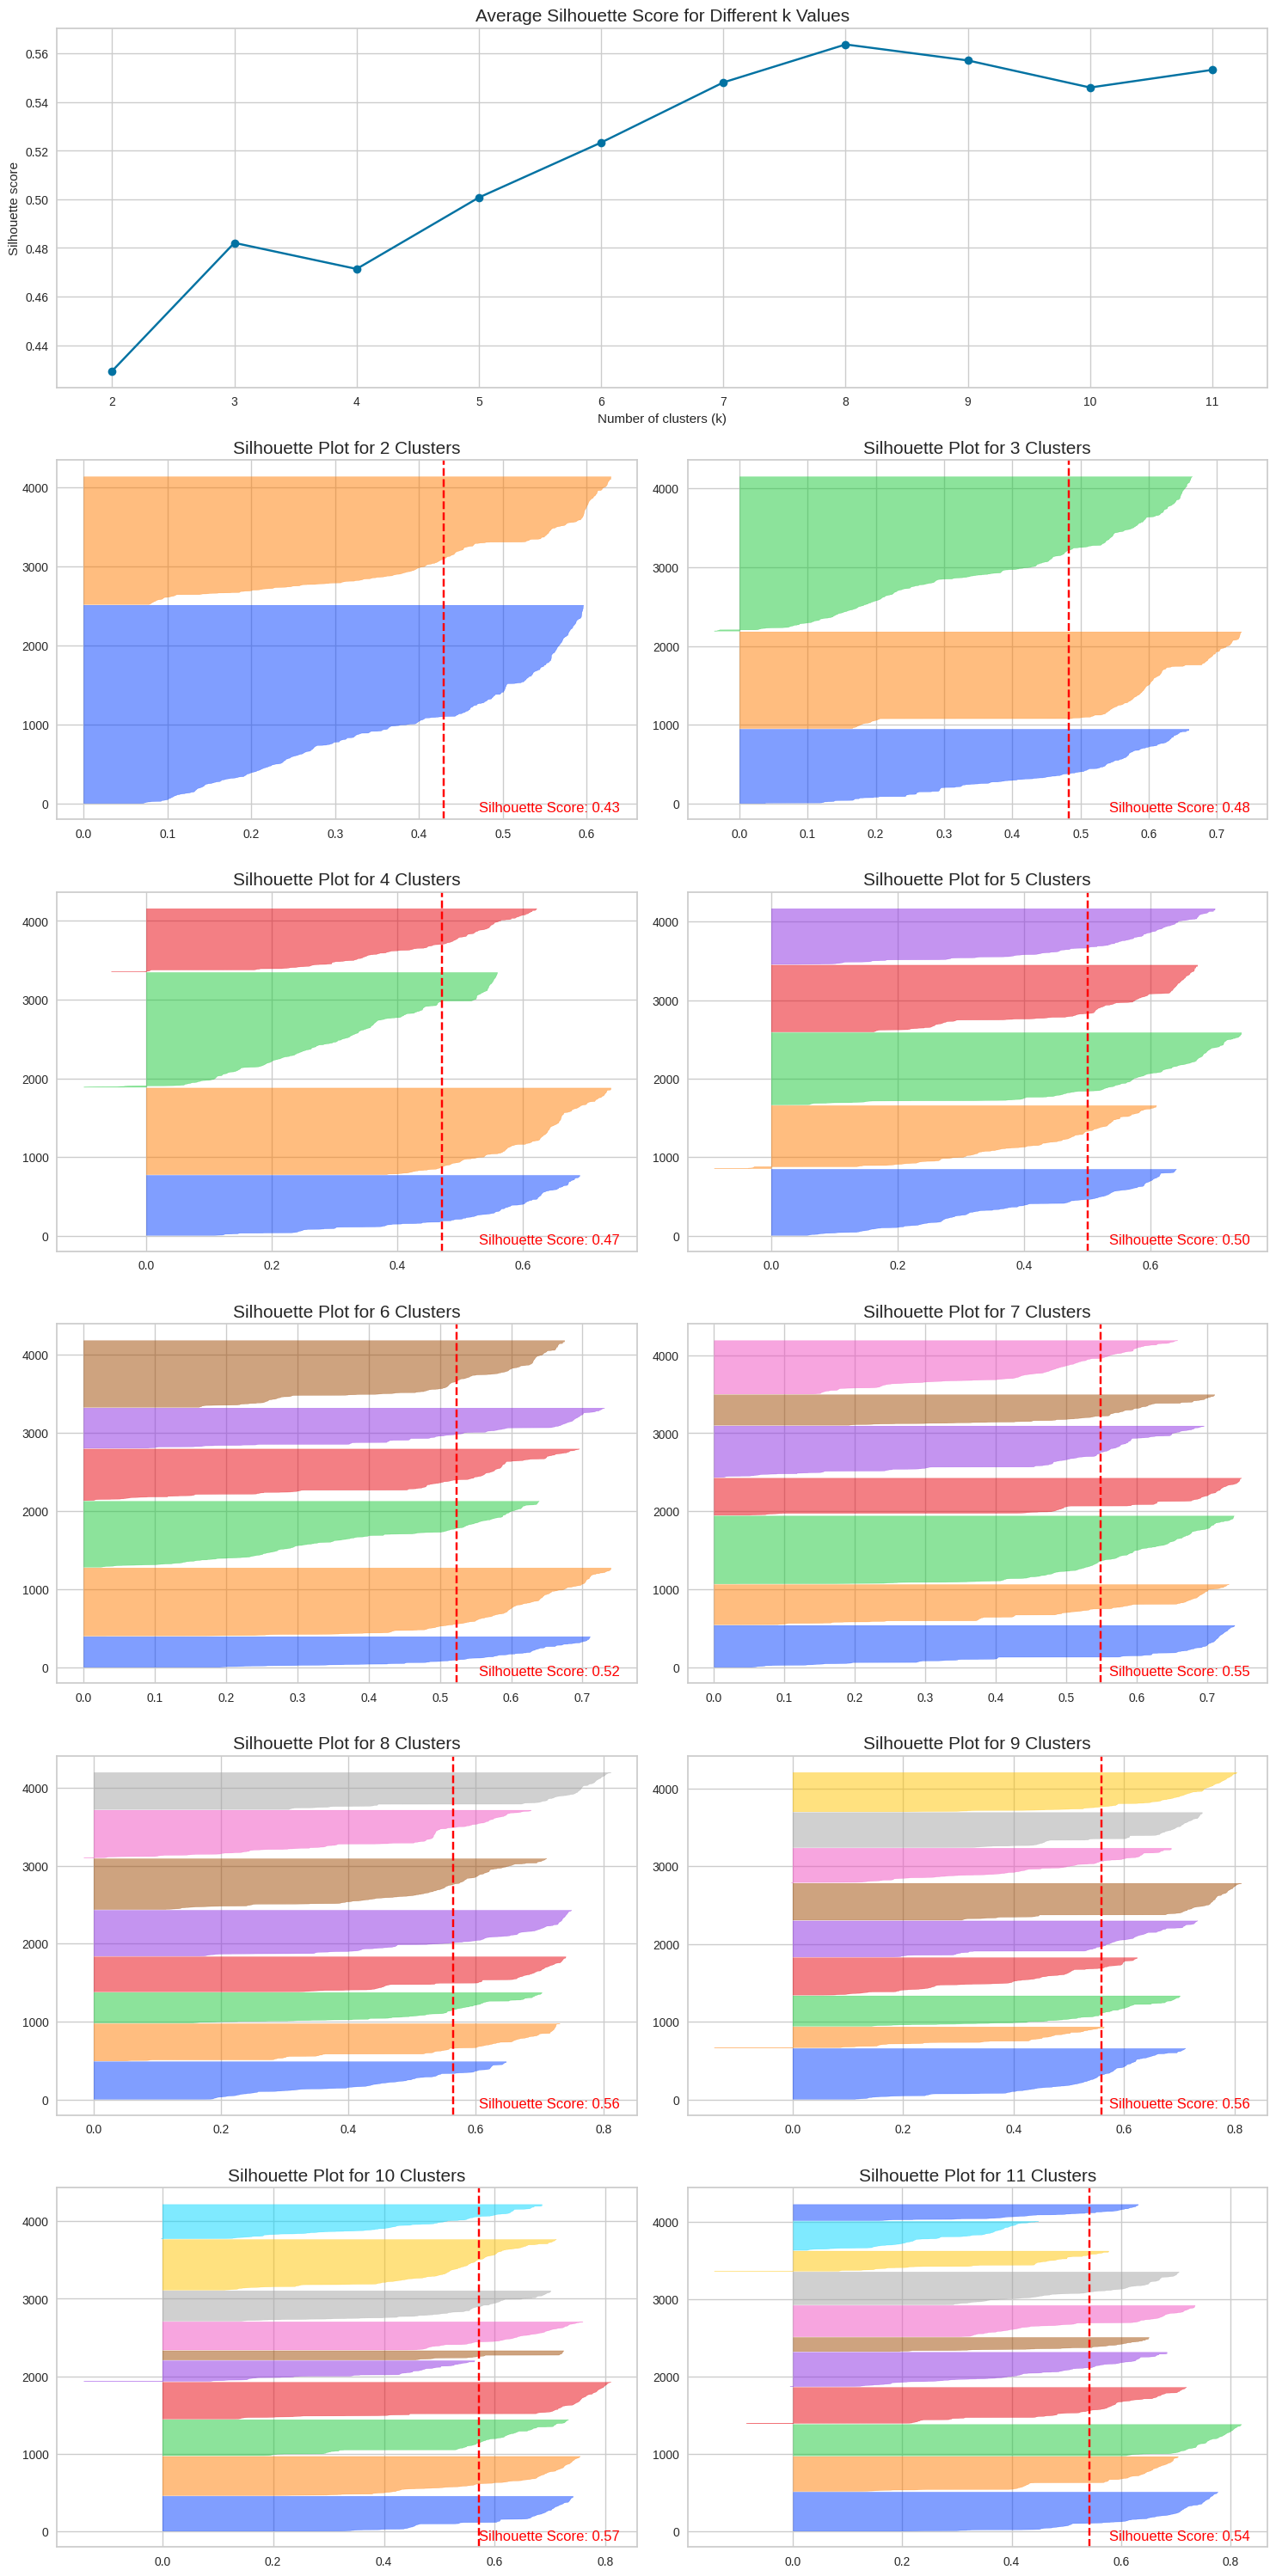

In [ ]:
silhouette_analysis(df_tree, 2, 11, figsize=(15, 50))

Valor k ideal: insights do método Silhouette

Com base nas orientações acima e após considerar cuidadosamente os gráficos de silhueta, optarei por escolher um ( k = 8 ) para o modelo K-Means no espaço da Tree embedding. Essa escolha nos dará clusters equilibrados e bem definidos, tornando nossa solução de cluster mais forte e confiável.

In [ ]:
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(df_tree)
labels = kmeans.predict(df_tree)

In [ ]:
print(f'WSS value: {kmeans.inertia_}')
print(f'Silhouette score: {silhouette_score(df_tree, labels)}')

WSS value: 40332.0234375
Silhouette score: 0.5637548565864563


In [ ]:
df_tree.head()

,embedding_x,embedding_y
0,12.973886,-6.580562
1,10.509908,-12.509008
2,18.025784,11.920777
3,8.844110,-9.014686
4,8.842879,-9.012878


In [ ]:
df_clustered = df_tree.copy()
df_clustered['cluster'] = labels

In [ ]:
df_clustered

,embedding_x,embedding_y,cluster
0,12.973886,-6.580562,5
1,10.509908,-12.509008,1
2,18.025784,11.920777,7
3,8.844110,-9.014686,1
4,8.842879,-9.012878,1
...,...,...,...
4116,-0.510207,9.469331,6
4117,9.438467,18.185492,3
4118,-3.415326,20.004444,2
4119,-2.347689,13.342673,2


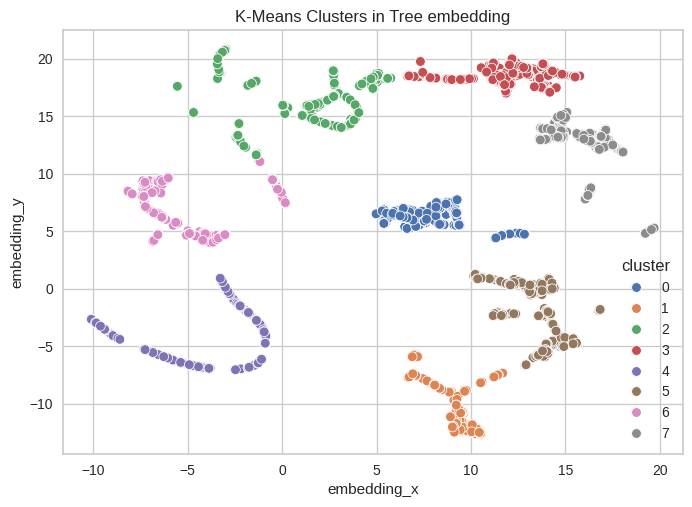

In [ ]:
ax = sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df_clustered,
                palette='deep')
ax.set_title('K-Means Clusters in Tree embedding')
plt.show()

In [ ]:
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

In [ ]:
df_cluster = customer_data_cleaned.copy()
df_cluster['cluster'] = labels
df_cluster

,customer_id,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std,cluster
0,13047.0,10,1391,3237.54,18.822907,31,106,2.0,2,13,8,1.142857,404.6925,174.402907,5
1,12583.0,15,5060,7281.38,29.479271,2,115,1.50813,4,12,3,0.75,606.781667,285.194031,1
2,13748.0,5,439,948.25,33.866071,95,24,10.296296,0,9,0,0.0,316.083333,97.181947,7
3,15291.0,15,2103,4668.3,45.323301,25,62,3.411765,2,16,5,0.454545,666.9,179.245487,1
4,17809.0,12,2057,5411.91,88.719836,15,46,5.95,4,15,3,3.0,676.48875,688.795821,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,13436.0,1,76,196.89,16.4075,1,12,0.0,3,10,0,0.0,196.89,0.0,6
4117,15520.0,1,314,343.5,19.083333,1,18,0.0,3,10,0,0.0,343.5,0.0,3
4118,13298.0,1,96,360.0,180.0,0,2,0.0,3,13,0,0.0,360.0,0.0,2
4119,14569.0,1,79,227.39,18.949167,0,10,0.0,3,14,0,0.0,227.39,0.0,2


# <b><span style='color:white;font-size:90%'>17 | </span><span style='color:#6e7570;font-size:90%'>Cluster Analysis</span></b>

Esta etapa é essencial para validar a eficácia do agrupamento e para garantir que os agrupamentos sejam coerentes e bem separados. Iremos observar as distribuições em cada cluster e depois traçar um perfil para cada um deles.

In [ ]:
cluster_percentage = (df_cluster['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['cluster', 'percentage']
cluster_percentage.sort_values(by='cluster', inplace=True)

In [ ]:
cluster_percentage

,cluster,percentage
5,0,11.477797
6,1,10.895414
1,2,14.875030
2,3,14.244116
7,4,9.463722
0,5,15.797137
4,6,11.574860
3,7,11.671924


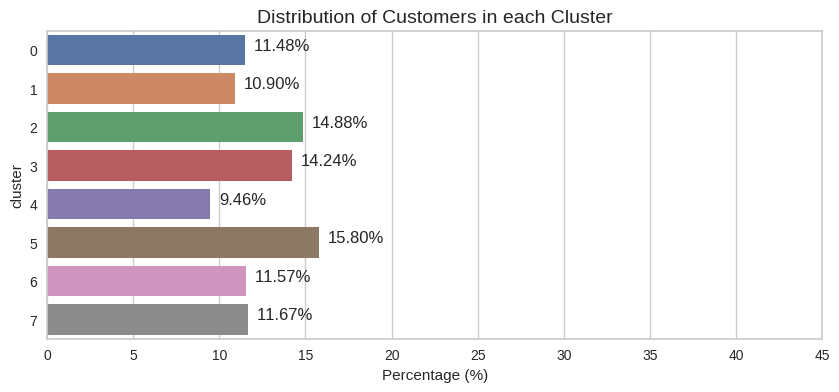

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='percentage', y='cluster', data=cluster_percentage, orient='h', palette='deep')
for index, value in enumerate(cluster_percentage['percentage']):
    ax.text(value+0.5, index, f'{value:.2f}%')
plt.title('Distribution of Customers in each Cluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
plt.show()

Observamos uma distribuição mais equilibrada entre os clusters, onde o cluster 5 ocupa a maior parte dos clientes (16% aproximadamente). Os demais clusters acomodam um percentual de clientes equilibrado, o que é bom, pois se esse percentual fosse baixo talvez estes clusters teriam uma representatividade menor contendo ruídos ou valores atípicos neles. De qualquer modo, precisamos analisar individualmente cada cluster.

Para examinar melhor a qualidade do nosso cluster, empregarei as seguintes métricas:

- Pontuação de Silhueta: Uma medida para avaliar a distância de separação entre os clusters. Valores mais altos indicam melhor separação de clusters. Varia de -1 a 1.
- Pontuação Calinski Harabasz: Esta pontuação é usada para avaliar a dispersão entre e dentro dos clusters. Uma pontuação mais alta indica clusters melhor definidos.
- Pontuação Davies Bouldin: Avalia a similaridade média entre cada cluster e seu cluster mais semelhante. Valores mais baixos indicam melhor separação de clusters.

In [ ]:
# Compute number of customers
num_observations = len(df_clustered)

# Separate the features and the cluster labels
X = df_clustered.drop('cluster', axis=1)
clusters = df_clustered['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations

metrics = pd.DataFrame({
    "Metric": ["Number of Observations", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"],
    "Value": [num_observations, sil_score, calinski_score, davies_score]
})
metrics.set_index("Metric", inplace=True)
metrics

,Value
Metric,
Number of Observations,4121.000000
Silhouette Score,0.563755
Calinski Harabasz Score,8629.782219
Davies Bouldin Score,0.596709


- Um Silhouette Score em torno de 0.56, embora não seja tão próximo de 1, sugere uma separação satisfatória entre os clusters. Isso indica que os grupos são relativamente distintos, embora possam haver algumas sobreposições menores entre eles. Idealmente, uma pontuação mais próxima de 1 seria preferível, pois indicaria clusters mais claramente definidos e separados.

- A pontuação Calinski-Harabasz de 8629,78 é consideravelmente alta, o que indica uma boa definição dos clusters. Uma pontuação mais alta nessa métrica geralmente sugere uma definição mais clara dos clusters, o que implica que nosso algoritmo de clusterização conseguiu identificar uma estrutura significativa no espaço de dados utilizado.

- A pontuação Davies Bouldin de 0.59 é uma pontuação razovelmente baixa, indicando que os clusters estão bem separados e relativamente compactos, além de não serem muito similares.

Em resumo, as métricas indicam que a qualidade do agrupamento é boa, com clusters bem definidos e notavelmente separados.